In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train=train.drop_duplicates(keep=False)
train['Age']=train['Age'].fillna(train['Age'].median())
train['Age']=train['Age'].astype(int)
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])
train=train.drop(columns='Cabin',errors='ignore')
train['Sex']=train['Sex'].astype('category')
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [4]:
train['Member'] = train['SibSp'] + train['Parch'] + 1
train=train.drop(columns=['SibSp','Parch'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Member
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,1


In [5]:
train['TicketNumber']=train['Ticket'].str.extract("(\d+)$")
train['TicketNumber']=train['TicketNumber'].fillna(0).astype(int)
train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Embarked        0
Member          0
TicketNumber    0
dtype: int64

In [6]:
train['Fare'] = train['Fare'].replace([np.inf, -np.inf], np.nan).fillna(train['Fare'].median())

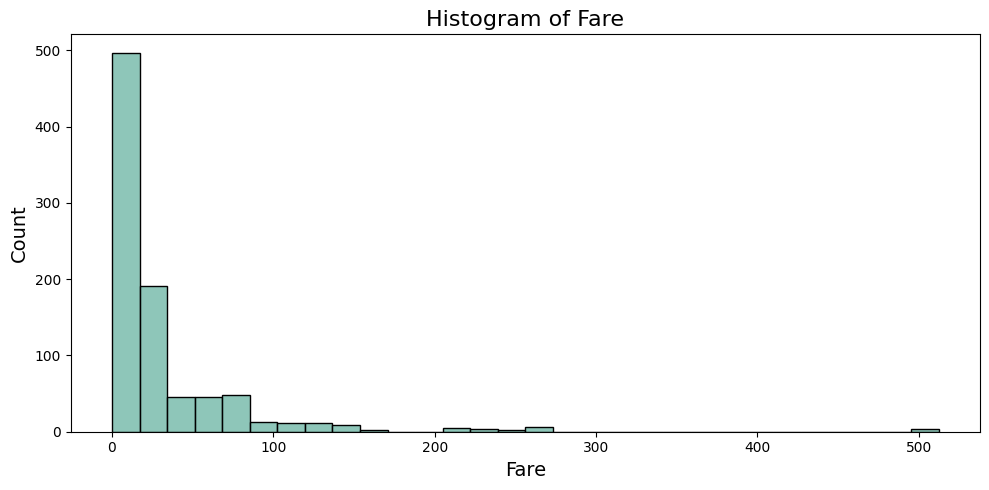

In [7]:
# Plot the distribution of fares
plt.figure(figsize=(10, 5))
sns.histplot(train['Fare'], bins=30, kde=False, color='#69b3a2')
plt.title('Histogram of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
train['Alone'] = (train['Member'] == 1).astype(int)
train['AgeBin'] = pd.cut(train['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','Young Adult','Adult','Senior'])
train['FareBin'] = pd.qcut(train['Fare'], 4, labels=['Low','Mid','High','Very High'])

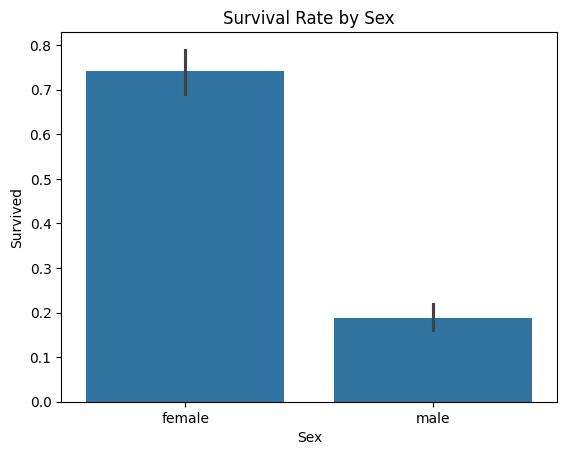

In [9]:
# Plot survival rate by sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

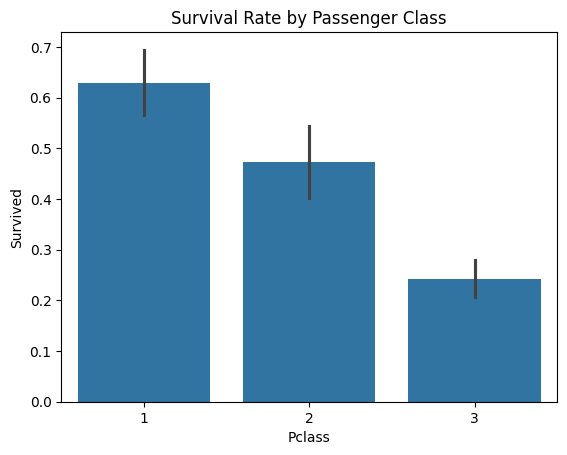

In [10]:
# Plot survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

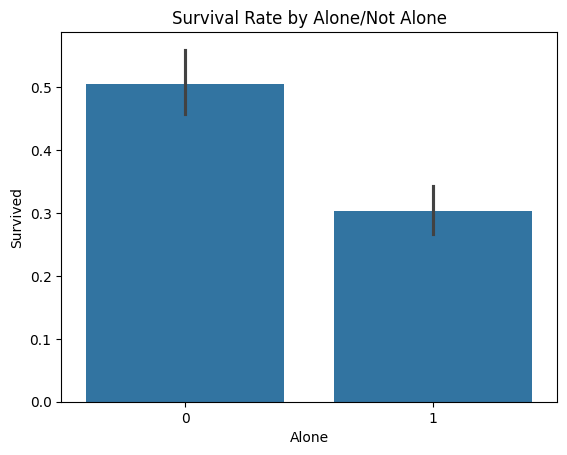

In [11]:
# Plot survival rate by alone/not alone
sns.barplot(x='Alone', y='Survived', data=train)
plt.title('Survival Rate by Alone/Not Alone')
plt.show()

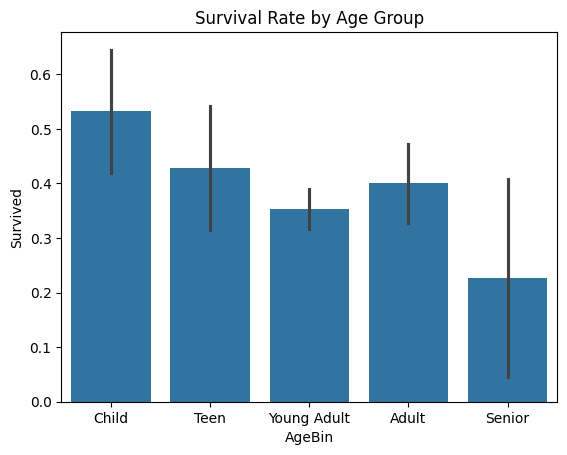

In [12]:
# Plot survival rate by age group
sns.barplot(x='AgeBin', y='Survived', data=train)
plt.title('Survival Rate by Age Group')
plt.show()

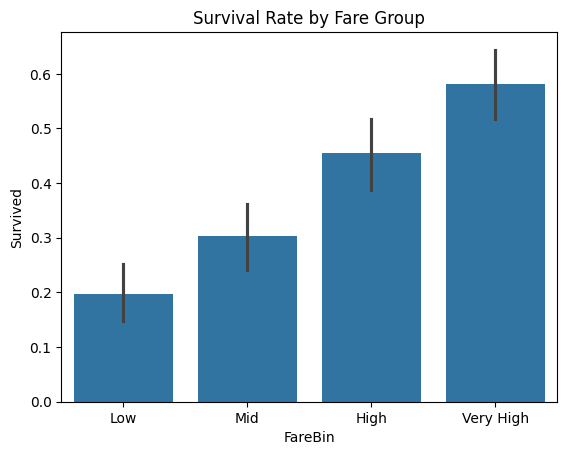

In [13]:
# Plot survival rate by fare group
sns.barplot(x='FareBin', y='Survived', data=train)
plt.title('Survival Rate by Fare Group')
plt.show()

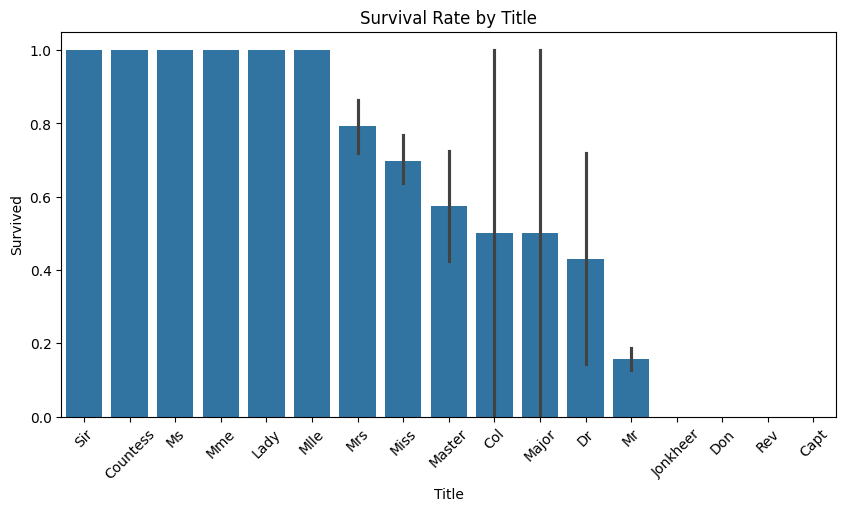

In [14]:
# Plot survival rate by title
plt.figure(figsize=(10,5))
sns.barplot(x='Title', y='Survived', data=train, order=train.groupby('Title')['Survived'].mean().sort_values(ascending=False).index)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()

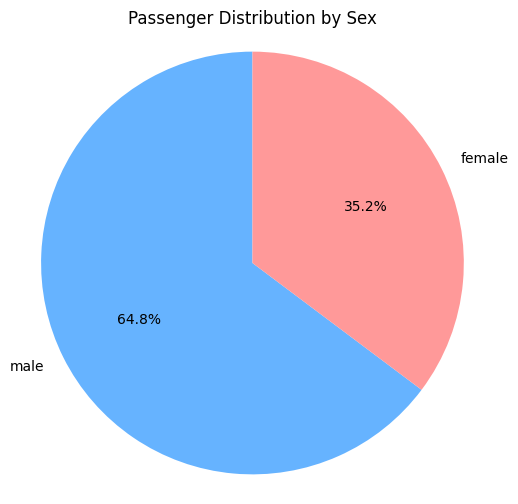

In [15]:
# Pie chart of passenger distribution by sex
sex_counts = train['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Passenger Distribution by Sex')
plt.axis('equal')
plt.show()